In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
anime_df=pd.read_csv("C://Users//mvish//Desktop//anime.csv")
anime_df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [11]:
genre_series = anime_df['genre'].str.split(', ').explode()
genre_counts = genre_series.value_counts()
genre_counts

Comedy           4645
Action           2845
Adventure        2348
Fantasy          2309
Sci-Fi           2070
Drama            2016
Shounen          1712
Kids             1609
Romance          1464
School           1220
Slice of Life    1220
Hentai           1141
Supernatural     1037
Mecha             944
Music             860
Historical        806
Magic             778
Ecchi             637
Shoujo            603
Seinen            547
Sports            543
Mystery           495
Super Power       465
Military          426
Parody            408
Space             381
Horror            369
Harem             317
Demons            294
Martial Arts      265
Dementia          240
Psychological     229
Police            197
Game              181
Samurai           148
Vampire           102
Thriller           87
Cars               72
Shounen Ai         65
Shoujo Ai          55
Josei              54
Yuri               42
Yaoi               39
Name: genre, dtype: int64

In [4]:
top_rated_anime = anime_df.nlargest(10, 'rating')

# Most Popular Anime by Members
most_popular_anime = anime_df.nlargest(10, 'members')

In [5]:
top_rated_anime

,anime_id,name,genre,type,episodes,rating,members
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13
10400,30120,Spoon-hime no Swing Kitchen,"Adventure, Kids",TV,Unknown,9.60,47
9595,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
9078,33607,Kahei no Umi,Historical,Movie,1,9.33,44
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
10786,26313,Yakusoku: Africa Mizu to Midori,"Drama, Kids",OVA,1,9.25,53
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [7]:
most_popular_anime

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
445,10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26,8.07,657190
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817


Text(0, 0.5, 'Anime')

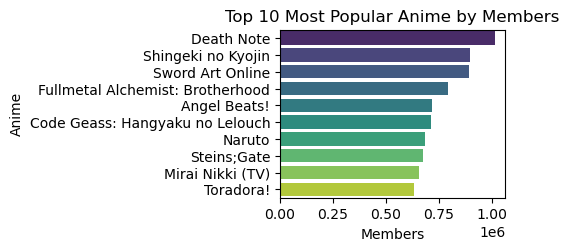

In [8]:
# Most Popular Anime by Members
plt.subplot(2, 2, 2)
sns.barplot(x='members', y='name', data=most_popular_anime, palette='viridis')
plt.title('Top 10 Most Popular Anime by Members')
plt.xlabel('Members')
plt.ylabel('Anime')

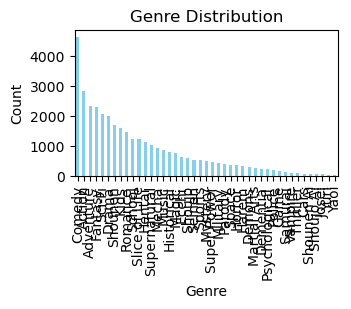

In [12]:
# Genre Analysis
plt.subplot(2, 2, 3)
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [15]:
# Rating Distribution
rating_distribution = anime_df['rating']

# Anime Types Distribution
type_distribution = anime_df['type'].value_counts()
rating_distribution

0        9.37
1        9.26
2        9.25
3        9.17
4        9.16
         ... 
12289    4.15
12290    4.28
12291    4.88
12292    4.98
12293    5.46
Name: rating, Length: 12294, dtype: float64

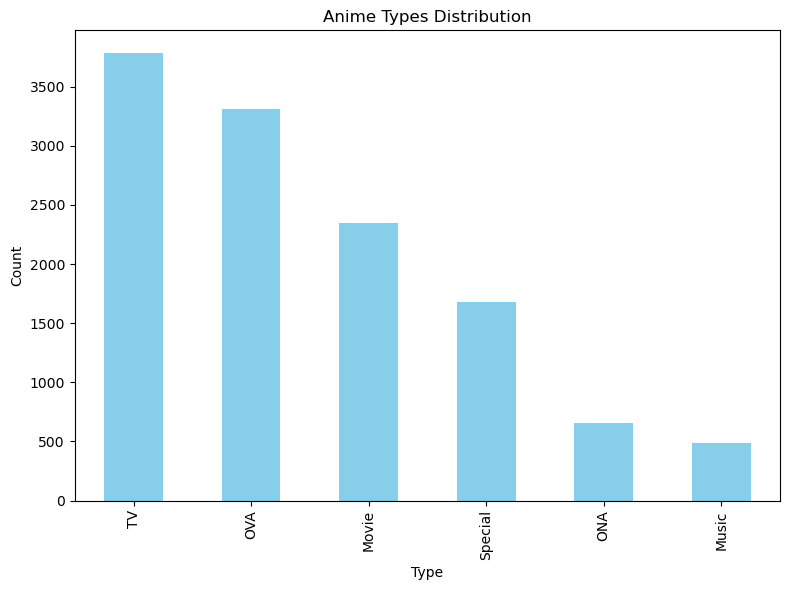

In [16]:
# Anime Types Distribution
plt.figure(figsize=(8, 6))
type_distribution.plot(kind='bar', color='skyblue')
plt.title('Anime Types Distribution')
plt.xlabel('Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [17]:
anime_df.dropna(inplace=True)

In [18]:
anime_df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [19]:
# One-hot encode the genres
genres_encoded = anime_df['genre'].str.get_dummies(sep=', ')


In [20]:
# Normalize the ratings
scaler = MinMaxScaler()
anime_df['rating'] = scaler.fit_transform(anime_df[['rating']])


In [21]:
scaler

MinMaxScaler()

In [22]:
anime_df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,0.924370,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,0.911164,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,0.909964,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,0.900360,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,0.899160,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,0.297719,211
12290,5543,Under World,Hentai,OVA,1,0.313325,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,0.385354,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,0.397359,175


In [23]:
# Combine the genres and ratings into a single DataFrame
features = pd.concat([genres_encoded, anime_df[['rating']]], axis=1)

# Ensure no NaN values remain after feature combination
features.dropna(inplace=True)


In [24]:
features

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,rating
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0.924370
1,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0.911164
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.909964
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.900360
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.899160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.297719
12290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.313325
12291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.385354
12292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.397359


In [25]:
# Split the original dataset to keep track of titles and other information
train_df, test_df = train_test_split(anime_df, test_size=0.2, random_state=42)

# Split the features DataFrame to match the train and test splits
train_features = features.loc[train_df.index]
test_features = features.loc[test_df.index]

# Double-check for any NaN values in the train_features DataFrame
assert not train_features.isnull().values.any(), "train_features contains NaN values"


In [26]:
train_df

,anime_id,name,genre,type,episodes,rating,members
909,9201,Air Gear: Kuro no Hane to Nemuri no Mori - Bre...,"Action, Comedy, Ecchi, Shounen, Sports",OVA,3,0.732293,40176
7480,32811,Black Ocean,Music,Music,1,0.445378,83
496,416,Kurenai no Buta,"Action, Adventure, Comedy, Drama, Historical, ...",Movie,1,0.763505,74028
9204,28965,Kibun wa Uaa Jitsuzai OL Kouza,"Comedy, Seinen",OVA,1,0.499400,51
6846,31972,Tang Lang Bu Chan,Historical,Movie,1,0.507803,112
...,...,...,...,...,...,...,...
12231,13051,Bishoujo Animerama: Miyuki-chan SOS-H Shichauzo,Hentai,OVA,1,0.398559,235
5193,5917,Tsuru ni Notte: Tomoko no Bouken,Drama,Movie,1,0.583433,321
5392,3880,Makyou Densetsu Acrobunch,"Mecha, Sci-Fi, Shounen",TV,24,0.576230,318
860,22819,Aikatsu! Movie,"Music, School, Shoujo, Slice of Life",Movie,1,0.734694,2813


In [27]:
test_df

,anime_id,name,genre,type,episodes,rating,members
6211,556,Koutetsu Tenshi Kurumi Zero,"Drama, Romance, Sci-Fi",OVA,3,0.545018,3896
4674,21599,Fight Ippatsu! Juuden-chan!! OVA,"Comedy, Ecchi, Sci-Fi",OVA,1,0.599040,1285
8530,26209,Examurai Sengoku Recap,"Action, Samurai",Special,1,0.399760,108
6499,1037,Saint Beast: Seijuu Kourin-hen,"Action, Fantasy, Magic, Supernatural",TV,6,0.530612,6177
429,1089,Macross: Do You Remember Love?,"Action, Mecha, Military, Music, Romance, Sci-F...",Movie,1,0.770708,19240
...,...,...,...,...,...,...,...
5668,8249,Votoms Finder,"Action, Drama, Mecha, Military, Sci-Fi",OVA,1,0.566627,1735
3916,22661,One Piece: Cry Heart,"Fantasy, Shounen",Special,3,0.621849,3417
2140,6988,Doraemon Movie 30: Nobita no Ningyo Daikaisen,"Adventure, Comedy, Fantasy, Kids, Shounen",Movie,1,0.680672,1191
11413,2377,Kisaku,Hentai,OVA,6,0.599040,1563


In [ ]:
# Compute the cosine similarity matrix for the training features
similarity_matrix = cosine_similarity(train_features)


In [28]:
similarity_matrix

array([[1.        , 0.12662277, 0.39496817, ..., 0.33107556, 0.10731641,
        0.21253256],
       [0.12662277, 1.        , 0.11280497, ..., 0.12843281, 0.56902412,
        0.07107033],
       [0.39496817, 0.11280497, 1.        , ..., 0.08752544, 0.09560543,
        0.72416299],
       ...,
       [0.33107556, 0.12843281, 0.08752544, ..., 1.        , 0.10885046,
        0.25901966],
       [0.10731641, 0.56902412, 0.09560543, ..., 0.10885046, 1.        ,
        0.06023413],
       [0.21253256, 0.07107033, 0.72416299, ..., 0.25901966, 0.06023413,
        1.        ]])

In [33]:
def recommend_anime(anime_id, similarity_matrix, train_df, top_n=10):
    try:
        # Find the index of the anime_id in the training DataFrame
        idx = train_df[train_df['anime_id'] == anime_id].index[0]
        
        # Get the similarity scores for the given anime
        similarity_scores = list(enumerate(similarity_matrix[idx]))
        
        # Sort the anime based on similarity scores in descending order
        similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
        
        # Get the indices of the top_n most similar anime
        similar_anime_indices = [i[0] for i in similarity_scores[1:top_n+1]]
        
        # Get the anime_ids of the most similar anime
        similar_anime_ids = train_df['anime_id'].iloc[similar_anime_indices].values
        
        return similar_anime_ids
    except IndexError:
        # Handle case where the anime_id is not found
        return []


In [34]:
def get_recommendations_for_test_set(test_df, train_df, similarity_matrix, top_n=10):
    recommendations = {}
    for anime_id in test_df['anime_id']:
        recs = recommend_anime(anime_id, similarity_matrix, train_df, top_n)
        if recs:
            recommendations[anime_id] = recs
    return recommendations


In [35]:
def evaluate_recommendations(recommendations, test_df, train_df):
    y_true = []
    y_pred = []

    for anime_id in test_df['anime_id']:
        if anime_id in recommendations:
            recs = recommendations[anime_id]
            true_recs = train_df[train_df['anime_id'].isin(recs)]['anime_id'].tolist()
            y_true.extend([1] * len(true_recs))
            y_pred.extend([1 if rec in true_recs else 0 for rec in recs])

    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    return precision, recall, f1



In [36]:
recommendations = get_recommendations_for_test_set(test_df, train_df, similarity_matrix, top_n=10)
precision, recall, f1 = evaluate_recommendations(recommendations, test_df, train_df)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Precision: 0.0
Recall: 0.0
F1-score: 0.0


In [ ]:
plt.figure(figsize=(14, 10))

# Top 10 Highest Rated Anime
plt.subplot(2, 2, 1)
sns.barplot(x='rating', y='name', data=top_rated_anime, palette='viridis')
plt.title('Top 10 Highest Rated Anime')
plt.xlabel('Rating')
plt.ylabel('Anime')

In [ ]:
1. Can you explain the difference between user-based and item-based collaborative filtering?
User-Based Collaborative Filtering:

Definition: User-based collaborative filtering recommends items to a user based on the preferences and ratings of similar users.
Approach: It first identifies users who are similar to the target user (based on their past behavior, such as ratings). Once similar users are found, the system recommends
items that these similar users have liked or rated highly.

In [ ]:
Item-Based Collaborative Filtering:

Definition: Item-based collaborative filtering recommends items to a user based on the similarity between items.
Approach: It first identifies items that are similar to the items the target user has interacted with or rated highly. 
Recommendations are then generated based on these similar items.


In [ ]:
Definition: Collaborative filtering is a method used by recommendation systems to predict the preferences of a user by collecting preferences from many users. 
The fundamental assumption is that if users agreed in the past, they will agree in the future.